# Question-3

- Taking any two classes from the above data, add labels to them (0 or 1) and create a new csv file.

- Split the data into Train / Test set as 70/30.

**(a)** Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs.

**(b)** Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library.  (10 marks)


# Loading the data and adding the label 0 and 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('points.csv')

# Select First two classes
class_1 = df[df['color'] == 'red'].copy()  # Assign label 0
class_2 = df[df['color'] == 'green'].copy()  # Assign label 1

# Assign labels using .loc
class_1.loc[:, 'label'] = 0
class_2.loc[:, 'label'] = 1

# Concatenate the two classes
labeled_data = pd.concat([class_1, class_2], ignore_index=True)

# Split the data into Train / Test set as 70/30 .

In [2]:
# Split the data into training and testing sets
train_ratio = 0.7
train_size = int(train_ratio * labeled_data.shape[0])
train_data = labeled_data.sample(n=train_size, random_state=1)
test_data = labeled_data.drop(train_data.index)

# Save the labeled data to a new CSV file
labeled_data.to_csv('labeled_data.csv', index=False)

# Display the first few rows of the labeled data
print(labeled_data.head())


          x         y color  label
0  1.387553  2.489342   red      0
1  1.820875  2.111633   red      0
2  1.574059  3.741801   red      0
3  1.254696  3.721808   red      0
4  4.206315  2.719694   red      0


# Logistic Regression Code from the previous lab

In [3]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the prediction function
def predict(X, theta):
    return sigmoid(np.dot(X, theta))

# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    h = predict(X, theta)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


# Define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        h = predict(X, theta)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost_history[i] = cost_function(X, y, theta)
    
    return theta, cost_history

# Prepare the data for logistic regression
X_train = train_data[['x', 'y']].values
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add intercept term
y_train = train_data['label'].values.reshape(-1, 1)

# Initialize parameters
theta = np.zeros((X_train.shape[1], 1))

# Hyperparameters
learning_rate = 0.1
iterations = 1000

# Train the model
theta_final, _ = gradient_descent(X_train, y_train, theta, learning_rate, iterations)


# (a) Plot the decision boundary.

In the logistic regression model:

**h_θ(x) = 1 / (1 + e ^ - {θ_0 + θ_1 * x_1 + θ_2 * x_2}).**

The decision boundary is set where (h_\theta(x) = 0.5), because this is the point where we must decide whether y = 0 or y = 1. 


For (h_\theta(x) = 0.5), the function inside the exponent must be 0. So, we have:


θ_0 + θ_1 * x_1 + θ_2 * x_2 = 0.

Or, x_2 = - {θ_0 + θ_1 * x_1} **/** θ_2



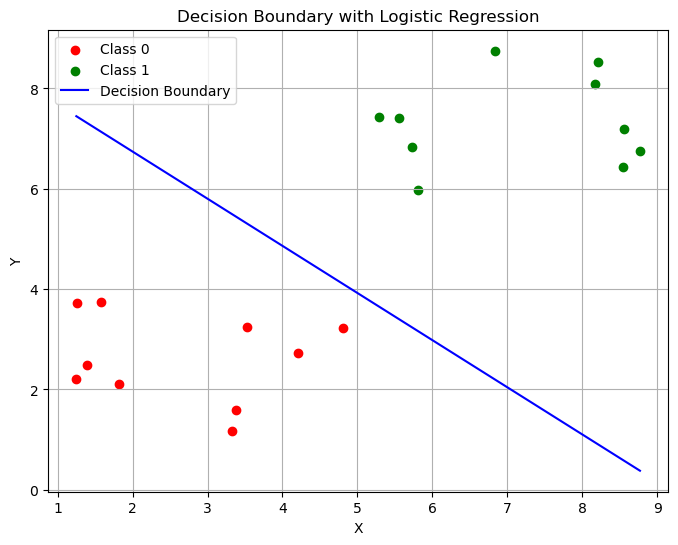

In [4]:
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(class_1['x'], class_1['y'], color='red', label='Class 0')
plt.scatter(class_2['x'], class_2['y'], color='green', label='Class 1')

# Calculate the decision boundary line
x_values = np.array([np.min(X_train[:, 1]), np.max(X_train[:, 1])])
y_values = -(theta_final[0] + theta_final[1] * x_values) / theta_final[2]

# Plot the decision boundary line
plt.plot(x_values, y_values, color='blue', label='Decision Boundary')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary with Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


# (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy.

In [5]:
# Evaluation Metrics
def precision(y_true, y_pred):
    """ Precision is the ratio of correctly predicted positive observations
        to the total predicted positive observations.
    """
    TP = np.sum((y_true == 1) & (y_pred == 1)) # True Positives
    FP = np.sum((y_true == 0) & (y_pred == 1)) # False Positives
    return TP / (TP + FP)

def recall(y_true, y_pred):
    """ Recall (Sensitivity) is the ratio of correctly predicted positive observations
        to the all observations in actual class.
    """
    TP = np.sum((y_true == 1) & (y_pred == 1)) # True Positives
    FN = np.sum((y_true == 1) & (y_pred == 0)) # False Negatives
    return TP / (TP + FN)

def f1_score(y_true, y_pred):
    """ F1 Score is the weighted average of Precision and Recall. Therefore, 
       this score takes both false positives and false negatives into account.
    """
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec)

def accuracy(y_true, y_pred):
    """ Accuracy is the most intuitive performance measure and it is simply 
        a ratio ofcorrectly predicted observation to the total observations
    """
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

# Calculate evaluation metrics for the test data
X_test = test_data[['x', 'y']].values
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add intercept term
y_test = test_data['label'].values.reshape(-1, 1)

# Predict labels for the test data
y_pred_proba = predict(X_test, theta_final)
y_pred_binary = (y_pred_proba >= 0.5).astype(int)

# Calculate evaluation metrics
precision_score = precision(y_test, y_pred_binary)
recall_score = recall(y_test, y_pred_binary)
f1_score_value = f1_score(y_test, y_pred_binary)
accuracy_score = accuracy(y_test, y_pred_binary)

print("Precision:", precision_score)
print("\nRecall:", recall_score)
print("\nF1-Score:", f1_score_value)
print("\nAccuracy:", accuracy_score)


Precision: 1.0

Recall: 1.0

F1-Score: 1.0

Accuracy: 1.0


# Plot the decision boundary and test data.

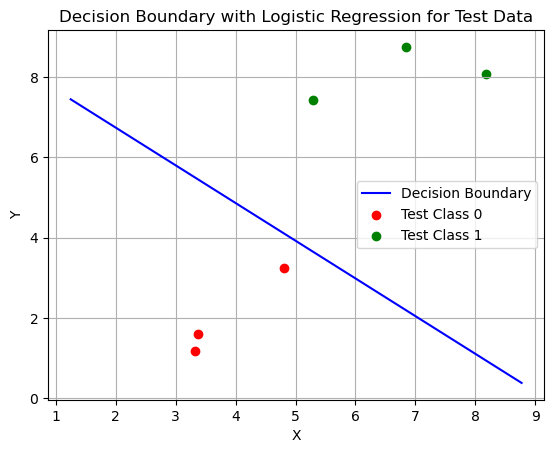

In [6]:
# Plot the decision boundary and test data
plt.plot(x_values, y_values, color='blue', label='Decision Boundary')

# Plot the test data
plt.scatter(test_data[test_data['label'] == 0]['x'], test_data[test_data['label'] == 0]['y'], color='red', label='Test Class 0')
plt.scatter(test_data[test_data['label'] == 1]['x'], test_data[test_data['label'] == 1]['y'], color='green', label='Test Class 1')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary with Logistic Regression for Test Data')
plt.legend()
plt.grid(True)
plt.show()
